In [22]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as ss
from scipy.io import wavfile 

In [23]:
file = "practice.wav"
fs, data = wavfile.read(file)

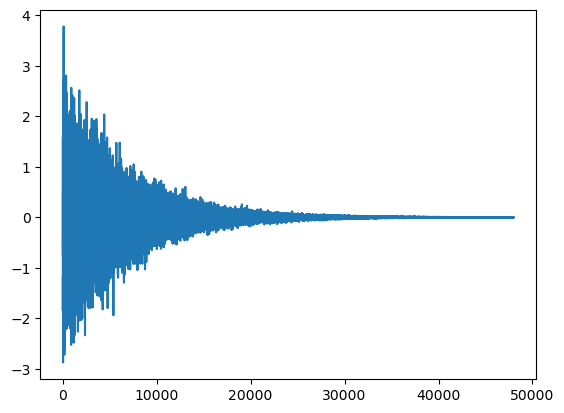

In [24]:
n = np.arange(fs)
RT60 = 1

C = 3 * np.log(10/RT60)

bn = np.random.randn(len(n))
hn = bn * np.exp(-C / fs * n)

plt.plot(hn)

# Comb Filter
$H(z) = \frac{z^{-m}}{1 - g * z^{-m}}$

$ \frac{20 * log10(gi)}{mi * Ts} = \frac{-60}{RT60}$

In [25]:
fs = 48000
Tr = RT60
Ts = 1/fs

#g = 0.8
#m = 20 * np.log10(g) * Tr / (-60 * Ts)

d = 0.02

m = int(d * fs) # assindo ~ 20ms = 0.02s
g = 10 ** (-60 * m * Ts/ (20 * RT60))

print(m)
print('----')
print(g)

960
----
0.8709635899560807


In [30]:
bk = np.zeros(m+1)
ak = np.zeros(m+1)
bk[m] = 1
ak[0] = 1; 
ak[m] = -g

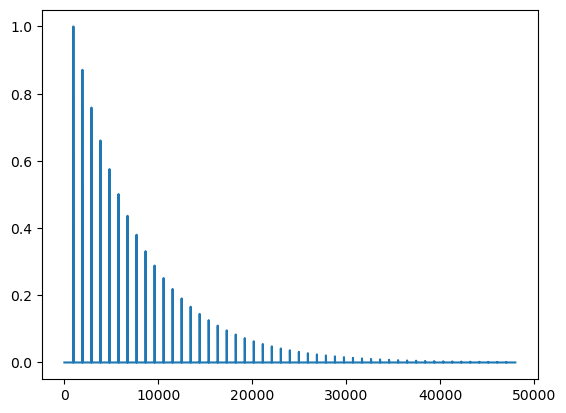

In [27]:
x = np.zeros(fs); 
x[0] = 1
y = ss.lfilter(bk,ak, x)
plt.plot(y)

In [28]:
w, H = ss.freqz(bk,ak, fs)

(0.0, 0.1, 0.0, 16.0)

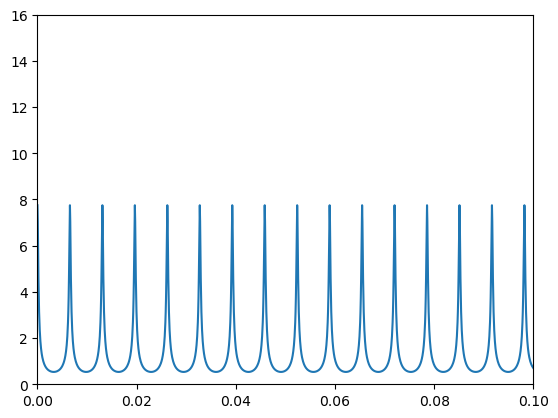

In [29]:
plt.plot(w, np.abs(H))
plt.axis([0, 0.1, 0, 16])